<a href="https://colab.research.google.com/github/pranav-kaushal/NLP-Project-Sentiment-Analysis/blob/main/Scotia_NLP_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install bs4

# Libraries

In [ ]:
# import libraries
import re
import csv
import json
from io import StringIO 
from bs4 import BeautifulSoup
import requests
import numpy as np
from time import sleep
from random import randint
#from selenium import webdriver

All Websites list

In [ ]:
url_y_conv = 'https://ca.finance.yahoo.com/quote/BNS.TO/community?p=BNS.TO'
url_wsj = ['https://www.wsj.com/search?query=bank%20of%20nova%20scotia&mod=searchresults_viewallresults','https://www.wsj.com/search?query=bank%20of%20nova%20scotia',
           'https://www.wsj.com/news/types/canada-news?mod=nav_top_subsection'] # Wall Street Journal: www.wsj.com 
url_ft = 'https://www.ft.com/search?sort=relevance&q=bank+of+nova+scotia' # Financial Times: www.ft.com 
url_gm = 'https://www.theglobeandmail.com/search/?q=%22bank+of+nova+scotia%22&S=relevant'	# The Globe & Mail: www.theglobeandmail.com/ 
url_bnn = 'https://www.bnnbloomberg.ca/search/bnn-search-7.337157?q=bank+of+nova+scotia' # BBN Bloomberg: https://www.bnnbloomberg.ca/
#•	Twitter on Canadian banking 


# **Scraping Yahoo *Finance*** Option 1

In [ ]:
results = requests.get(url_y_stats)

In [ ]:
soup = BeautifulSoup(results.text, 'lxml',)

In [ ]:
#soup = BeautifulSoup(results1.text, 'html.parser')
#news_links = soup.find_all("div",{'class="comments-list})

In [ ]:
pattern = re.compile(r'\s--\sData\s--\s')

In [ ]:
script_data = soup.find('script', text=pattern).contents[0]

In [ ]:
# Start of the web scrape
script_data[:500]

'\n(function (root) {\n/* -- Data -- */\nroot.App || (root.App = {});\nroot.App.now = 1617111727495;\nroot.App.main = {"context":{"dispatcher":{"stores":{"PageStore":{"currentPageName":"quote","currentEvent":{"eventName":"NEW_PAGE_SUCCESS"},"currentRenderTargetId":"default","pagesConfigRaw":{"base":{"quote":{"layout":{"bundleName":"yahoodotcom-layout.TwoColumnLayout","name":"TwoColumnLayout","config":{"enableHeaderCollapse":true,"additionalBodyWrapperClasses":"Bgc($layoutBgColor)!","contentWrapperClas'

In [ ]:
# End of the web scrape
script_data[500:]

'ses":"Bgc($lv2BgColor)!","Header":{"isFixed":true,"uhContainerClasses":"Bgi($uhGrayGradient) D(n)--print","navContainerClasses":"Bgi($navrailGrayGradient) Bxsh($navrailShadow) Pos(r) hasScrolled_Bxsh(headerShadow) Panel-open_Bxsh(headerShadow)","navTransitionClasses":"HideNavrail_Translate3d(0,-46px,0) Panel-open_Translate3d(0,-46px,0)","secondaryNavContainerClasses":"hasScrolled_Bdbw(0px) Bgc($lv3BgColor) Bxsh($navrailShadow) D(n)--print","height":135},"fetchNewAttribution":true},"meta":{"property":{"twitter:site":"@YahooFinance"}}},"meta":{"property":{"twitter:site":"@YahooFinanceCA","fb:pages":"168824166370","og:image":"https:\\u002F\\u002Fs.yimg.com\\u002Fcv\\u002Fapiv2\\u002Fsocial\\u002Fimages\\u002Fyahoo_default_logo.png"}},"enablePremium":false,"isHighValueUser":false,"videoOverrides":{"enableOathPlayer":true},"regions":{"UH":[{"bundleName":"react-finance","name":"UH","props":{"key":"UH-0-UH","id":"UH-0-UH"},"config":{"enableRichSearch":true,"disablePortfolioNavUpdate":false,"

In [ ]:
start = script_data.find("context")-2 # Starting characters will be 2 characters behing the word context

In [ ]:
json_data = json.loads(script_data[start:-12]) # last 12 characters do not contain anything ans will be removed.

In [ ]:
json_data['context'].keys()

dict_keys(['dispatcher', 'options', 'plugins'])

In [ ]:
# we will use the keys to find out the data listed under the dictionary items above
json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['financialData'].keys()

dict_keys(['ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'maxAge', 'revenuePerShare', 'quickRatio', 'recommendationMean'])

In [ ]:
#json_data['context']['dispatcher']['stores']['QuoteSummaryStore']['financialData'].keys()
json_data['context']['dispatcher']['stores']['PageStore'].keys()

dict_keys(['currentPageName', 'currentEvent', 'currentRenderTargetId', 'pagesConfigRaw', 'compositeConfig', 'compositeStatus', 'pageData', 'spaceid', 'status', 'appConfig', 'routeConfig', 'renderTargets', 'renderTargetsInited'])

In [ ]:
#Quarterly Income Statement
quarter_is = json_data[]

### **Yahoo *Finance*** reactions on $BNS.TO conversation

In [ ]:
results1 = requests.get(url_y_conv)
web_content1 = BeautifulSoup(results1.text, 'lxml',)
#soup = BeautifulSoup(web_content .text, 'html.parser')
#search_content = web_content.find('ul',{"class":'comments-list'}).text # We search for the user comments and extract text only.
search_content1 = [web_content1.find('div',{"id":'Main'}).text] # We search for the user comments based on Top Reactions and extract text only.

In [ ]:
print(search_content1)

["832 reactions on $BNS.TO conversationSign in to post a message.Top ReactionsHHBSitting on a 34% gain as I bought at 58. Should I sell?ReplyReplies (4)KKyleMan this stock is such a tease, always edging toward $80… then nope! LolReplyReplies (2)1SScottIf a bank can make money in low interest rates, Imagine when they start to rise :)ReplyReplies (2)131BBenWhy’s would people be selling this like a week out from ex dividend?ReplyReplies (1)4JJor Jor Binkshi everyone, I just bought into Scotia and I'm super excited for the dividend and to watch bank stocks soar on the pandemic recovery.ReplyReplies (4)6SScottThis has it all, Growth, Value, international exposure, low commercial real estate exposure, growing dividend, and is only going to benefit from rising rates.ReplyReplies (2)132RRobertThe Government will allow the Canadian banks to announce dividends again shortly. The budget is a priority but before the third quarter or July 31st they will allow dividends again. All the banks have a h

### **Wall Street Journal**

In [ ]:
search_content2 = []
for url in url_wsj:
  results2 = requests.get(url)
  web_content2 = BeautifulSoup(results2.text, 'html.parser')
  #search_text2 = web_content2.find('div',{"class":''}) # We search for the user comments and extract text only.
  search_text2 = web_content2.find_all(text=True) # We search for the user comments based on Top Reactions and extract text only.
  search_content2.append(search_text2)

print(search_content2)

[['\n', 'doctype html', 'GRAND CANYON PREBID ', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '\n', '@font-face{font-family:Retina;src:url(https://www.wsj.com/fonts/woffs/retina/Retina-Book.woff2) format("woff2"),url(https://www.wsj.com/fonts/woffs/retina/Retina-Book.woff) format("woff");font-weight:400;font-style:normal;font-display:swap}@font-face{font-family:Retina;src:url(https://www.wsj.com/fonts/woffs/retina/Retina-BookItalic.woff2) format("woff2"),url(https://www.wsj.com/fonts/woffs/retina/Retina-BookItalic.woff) format("woff");font-weight:400;font-style:italic;font-display:optional}@font-face{font-family:Retina;src:url(https://www.wsj.com/fonts/woffs/retina/Retina-Light.woff2) format("woff2"),url(https://www.wsj.com/fonts/woffs/retina/Retina-Light.woff) format("woff");font-weight:300;font-style:normal;font-display:swap}@font-face{font-family:Retina;src:url(https://www.wsj.com

### **Financial Times**

### **The Globe & Mail** 

In [ ]:
results4 = requests.get(url_gm)
#web_content4 = BeautifulSoup(results4.text, 'lxml',)
web_content4 = BeautifulSoup(results4.text, 'html.parser')
search_content4 = [web_content4.find('div',{"class":'c-search-results-news'}).text] # We search for the user comments based on Top Reactions and extract text only.
#search_content4 = web_content4.find_all('scotia')
print(search_content4)

['    Report on Business  Bank of Nova Scotia beats quarterly profit estimates    February 23         Inside the Market  The most oversold and overbought stocks on the TSX  Subscriber content         Scott Barlow   March 29         Report on Business  BMO exposure ‘immaterial’ in Archegos case, bank says  Subscriber content         James Bradshaw   March 30         Report on Business  Scotia CEO’s pay falls a little after big misses in targets  Subscriber content         David Milstead   March 10         Number Cruncher  Ten financial companies with strong profitability, bullish price momentum and reasonable valuations  Subscriber content         Gary Christie   March 11         Report on Business  Bank of Nova Scotia vacating top floors of Toronto’s Scotia Plaza skyscraper  Subscriber content         Rachelle Younglai   February 8         Report on Business  Telemedicine company Dialogue files to go public on TSX   Subscriber content         Sean Silcoff   March 8         Number Crunc

    Report on Business  Bank of Nova Scotia beats quarterly profit estimates    February 23         Inside the Market  The most oversold and overbought stocks on the TSX  Subscriber content         Scott Barlow   March 29         Report on Business  BMO exposure ‘immaterial’ in Archegos case, bank says  Subscriber content         James Bradshaw   March 30         Report on Business  Scotia CEO’s pay falls a little after big misses in targets  Subscriber content         David Milstead   March 10         Number Cruncher  Ten financial companies with strong profitability, bullish price momentum and reasonable valuations  Subscriber content         Gary Christie   March 11         Report on Business  Bank of Nova Scotia vacating top floors of Toronto’s Scotia Plaza skyscraper  Subscriber content         Rachelle Younglai   February 8         Report on Business  Telemedicine company Dialogue files to go public on TSX   Subscriber content         Sean Silcoff   March 8         Number Crunche

### **BBN Bloomberg** 

# Pre Processing

In [ ]:
processed_docs = [doc.lower().replace(".","") for doc in search_content]
processed_docs[0:10]

["832 reactions on $bnsto conversationsign in to post a messagetop reactionssscottif a bank can make money in low interest rates, imagine when they start to rise :)replyreplies (1)131hhbsitting on a 34% gain as i bought at 58 should i sell?replyreplies (3)jjor jor binkshi everyone, i just bought into scotia and i'm super excited for the dividend and to watch bank stocks soar on the pandemic recoveryreplyreplies (4)6bbenwhy’s would people be selling this like a week out from ex dividend?reply3sscottthis has it all, growth, value, international exposure, low commercial real estate exposure, growing dividend, and is only going to benefit from rising ratesreplyreplies (2)132rrobertthe government will allow the canadian banks to announce dividends again shortly the budget is a priority but before the third quarter or july 31st they will allow dividends again all the banks have a huge excess of capital over and above the requirements so get ready for special dividends and dividend increasesr

## Using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.get_feature_names())
print("-"*10)

#TFIDF representation for all documents in our corpus 
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray()) 
print("-"*10)

temp = tfidf.transform(["if a bank can make money in low interest rates"])
print("Tfidf representation for 'if a bank can make money in low interest rates':\n", temp.toarray())


IDF for all words in the vocabulary [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]
----------
All words in the vocabulary ['131hhbsitting', '132rrobertthe', '13bbo8000', '1ffadias', '1nnitini', '2021', '2ddevinnot', '31st', '32

# Pipeline for Sentiment Analysis


https://towardsdatascience.com/sentiment-analysis-of-social-media-with-python-45268dc8f23f

https://towardsdatascience.com/text-sentiment-analysis-in-nlp-ce6baba6d466

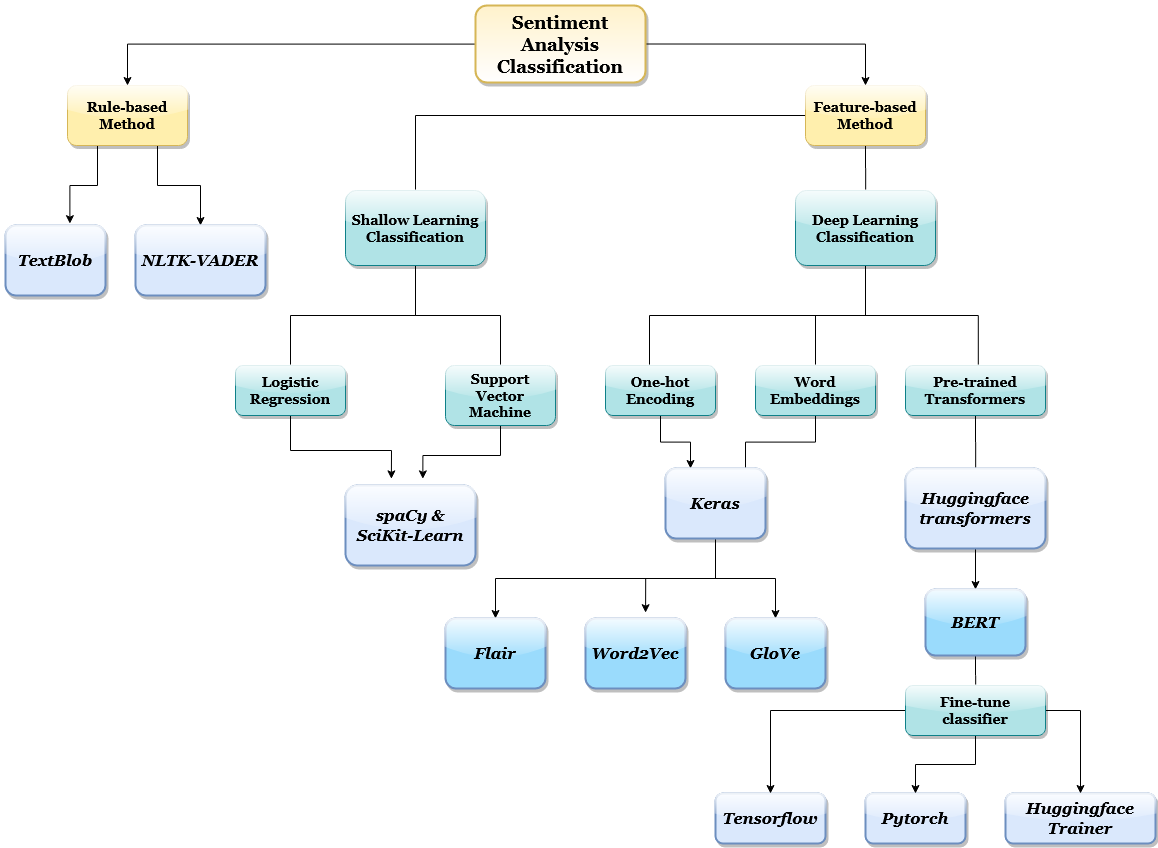